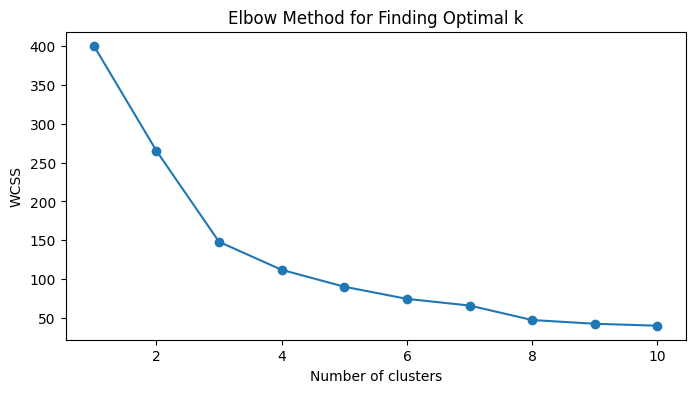

Giá trị k tối ưu được đề xuất: 3
[[ 0.88448091 -0.77575245]
 [-1.1277947  -0.48910321]
 [ 0.17359932  0.97046952]]
Phân cụm hoàn tất. Kết quả đã được lưu vào Countries_with_clusters.csv


In [4]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

file_path = 'Countries.csv'
data = pd.read_csv(file_path)
#print(data.head())

# a. Xây dựng hàm chứa thuật toán K-Means để phân cụm
def k_means_clustering(data, n_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    return kmeans.labels_, kmeans.cluster_centers_

# b. Xây dựng hàm để khảo sát việc lựa chọn k
def find_optimal_k(data, max_k=10):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    wcss = []  # Within-cluster sums of squares

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method for Finding Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    optimal_k = 0
    for i in range(1, len(wcss) - 1):  # Bỏ qua điểm đầu và cuối
        drop1 = wcss[i - 1] - wcss[i]
        drop2 = wcss[i] - wcss[i + 1]
        if drop1 > 2 * drop2:  # Logic "góc khủy tay" đơn giản
            optimal_k = i + 1  # Vì index bắt đầu từ 0
            break

    print(f'Giá trị k tối ưu được đề xuất: {optimal_k}')
    return optimal_k

# c. Xây dựng chương trình hoàn thiện và thực thi với dữ liệu đã cho
def main():
    # Đọc dữ liệu
    data = pd.read_csv(file_path)

    # Lựa chọn cột dữ liệu để phân cụm
    features = data[['Longitude', 'Latitude']]

    # Khảo sát số lượng cụm k
    #find_optimal_k(features)

    # Số cụm k tối ưu dựa trên phương pháp Elbow
    #optimal_k = 4  
    optimal_k = find_optimal_k(features)

    # Thực hiện phân cụm với k tối ưu
    labels, cluster_centers = k_means_clustering(features, optimal_k)
    print(cluster_centers)
    # Thêm nhãn cụm vào dữ liệu ban đầu
    data['Cluster'] = labels

    # Xuất dữ liệu đã phân cụm
    output_path = 'Countries_with_clusters.csv'
    data.to_csv(output_path, index=False)
    print(f'Phân cụm hoàn tất. Kết quả đã được lưu vào {output_path}')

# Thực thi chương trình
main()


In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

In [ ]:
# Ví dụ minh họa
point1 = [1, 2]
point2 = [4, 6]
distance = euclidean_distance(point1, point2)
print(f'Khoảng cách Euclid giữa {point1} và {point2} là {distance}')